# Chapter 2 snippets

### snippet 2.0

Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking
gr(size=(600,300))

Plots.GRBackend()

snippet 2.1

In [2]:
@show ways  = [0  , 3 , 8 , 9 , 0 ];
@show ways/sum(ways)

ways = [0, 3, 8, 9, 0] = [0, 3, 8, 9, 0]
ways / sum(ways) = [0.0, 0.15, 0.4, 0.45, 0.0]


5-element Array{Float64,1}:
 0.0 
 0.15
 0.4 
 0.45
 0.0 

snippet 2.2

In [3]:
@show d = Binomial(9, 0.5);
@show pdf(d, 6)

d = Binomial(9, 0.5) = Binomial{Float64}(n=9, p=0.5)
pdf(d, 6) = 0.1640625000000001


0.1640625000000001

snippet 2.3

define grid

In [4]:
p_grid = range( 0 , stop=1 , length=20 )

0.0:0.05263157894736842:1.0

define prior

In [5]:
prior = ones( 20 )

20-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

compute likelihood at each value in grid

In [6]:
likelihood = [pdf(Binomial(9, p), 6) for p in p_grid]

20-element Array{Float64,1}:
 0.0                  
 1.5181489823498353e-6
 8.185092949558011e-5 
 0.0007772922789631156
 0.0035985753655699746
 0.01116094609366412  
 0.0266829865137807   
 0.052921099147992784 
 0.09082697598243343  
 0.13834132601662863  
 0.18976862279372927  
 0.23611465826683395  
 0.26661125168434857  
 0.27140056190174167  
 0.24500508864811482  
 0.18976862279372927  
 0.1179181175789971   
 0.05026670207647313  
 0.008853844865064258 
 0.0                  

compute product of likelihood and prior

In [7]:
unstd_posterior = likelihood .* prior

20-element Array{Float64,1}:
 0.0                  
 1.5181489823498353e-6
 8.185092949558011e-5 
 0.0007772922789631156
 0.0035985753655699746
 0.01116094609366412  
 0.0266829865137807   
 0.052921099147992784 
 0.09082697598243343  
 0.13834132601662863  
 0.18976862279372927  
 0.23611465826683395  
 0.26661125168434857  
 0.27140056190174167  
 0.24500508864811482  
 0.18976862279372927  
 0.1179181175789971   
 0.05026670207647313  
 0.008853844865064258 
 0.0                  

standardize the posterior, so it sums to 1

In [8]:
posterior = unstd_posterior  ./ sum(unstd_posterior)

20-element Array{Float64,1}:
 0.0                   
 7.989837111322336e-7  
 4.307716842570822e-5  
 0.00040907966009970354
 0.0018938873152764026 
 0.005873872876336504  
 0.014042937706860135  
 0.02785174359436921   
 0.0478011546857793    
 0.07280739067692472   
 0.09987296389152912   
 0.12426432985697713   
 0.14031432341419828   
 0.14283488028690608   
 0.12894325738133897   
 0.09987296389152912   
 0.06205889954697725   
 0.026454766059438056  
 0.0046596730033231955 
 0.0                   

snippet 2.4

In [9]:
p1 = plot( p_grid , posterior ,
    xlab="probability of water" , ylab="posterior probability",
    lab = "interpolated", title="20 points" )
p2 = scatter!( p1, p_grid , posterior, lab="computed" )

savefig("s2_4.pdf")

snippet 2.5

In [10]:
prior1 = [p < 0.5 ? 0 : 1 for p in p_grid]
prior2 = [exp( -5*abs( p - 0.5 ) ) for p in p_grid]

p3 = plot(p_grid, prior1,
  xlab="probability of water" , ylab="posterior probability",
  lab = "semi_uniform", title="Other priors" )
p4 = plot!(p3, p_grid, prior2,  lab = "double_exponential" )

savefig("s2_5.pdf")

snippet 2.6 (see snippet 3_2 for explanations)

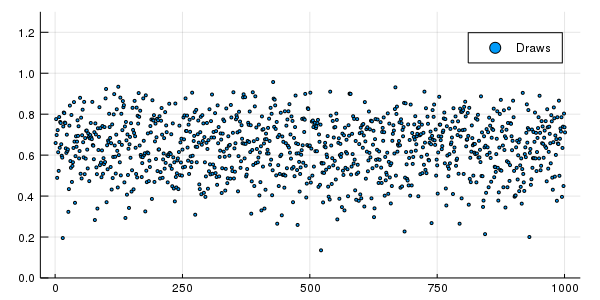

In [11]:
p_grid = range(0, step=0.001, stop=1)
prior = ones(length(p_grid))
likelihood = [pdf(Binomial(9, p), 6) for p in p_grid]
posterior = likelihood .* prior
posterior = posterior / sum(posterior)

samples = sample(p_grid, Weights(posterior), length(p_grid))

p = Vector{Plots.Plot{Plots.GRBackend}}(undef, 2)

p[1] = scatter(1:length(p_grid), samples, markersize = 2, ylim=(0.0, 1.3), lab="Draws")

analytical calculation

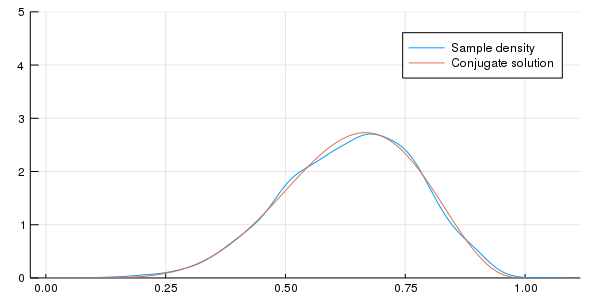

In [12]:
w = 6
n = 9
x = 0:0.01:1
p[2] = density(samples, ylim=(0.0, 5.0), lab="Sample density")
p[2] = plot!( x, pdf.(Beta( w+1 , n-w+1 ) , x ), lab="Conjugate solution")

quadratic approximation

In [13]:
plot!( p[2], x, pdf.(Normal( 0.67 , 0.16 ) , x ), lab="Normal approximation")
plot(p..., layout=(1, 2))
savefig("s2_6.pdf")

snippet 2.7
analytical calculation

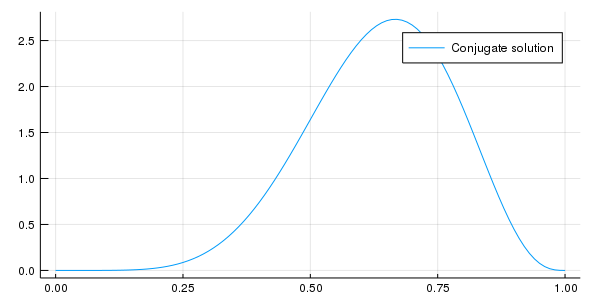

In [14]:
w = 6
n = 9
x = 0:0.01:1
plot( x, pdf.(Beta( w+1 , n-w+1 ) , x ), lab="Conjugate solution")

quadratic approximation

In [15]:
plot!( x, pdf.(Normal( 0.67 , 0.16 ) , x ), lab="Normal approximation")
savefig("s2_7.pdf")

snippet 2.8
The example is in stan_globe_toss.jl

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*